<a href="https://colab.research.google.com/github/pranavi2013/AIML_2024/blob/main/aimlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the test dataset
test_data = pd.read_csv("/content/Test.csv")

# Check for missing values
missing_values = test_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [2]:
# Fill missing values for numerical column "Item_Weight" with mean
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)

# Fill missing values for categorical column "Outlet_Size" with mode
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

# Verify if there are any missing values left
missing_values_after = test_data.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)


Missing values after handling:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [3]:
# One-hot encode categorical variables
test_data_encoded = pd.get_dummies(test_data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

# Drop the "Item_Identifier" column as it's not needed for modeling
test_data_encoded.drop(columns=['Item_Identifier'], inplace=True)

# Display the first few rows of the encoded dataset
print("Encoded dataset:")
print(test_data_encoded.head())


Encoded dataset:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0    20.750000         0.007565  107.8622                       1999   
1     8.300000         0.038428   87.3198                       2007   
2    14.600000         0.099575  241.7538                       1998   
3     7.315000         0.015388  155.0340                       2007   
4    12.695633         0.118599  234.2300                       1985   

   Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                False                      True                     False   
1                False                     False                     False   
2                False                      True                     False   
3                False                      True                     False   
4                False                     False                      True   

   Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
0   

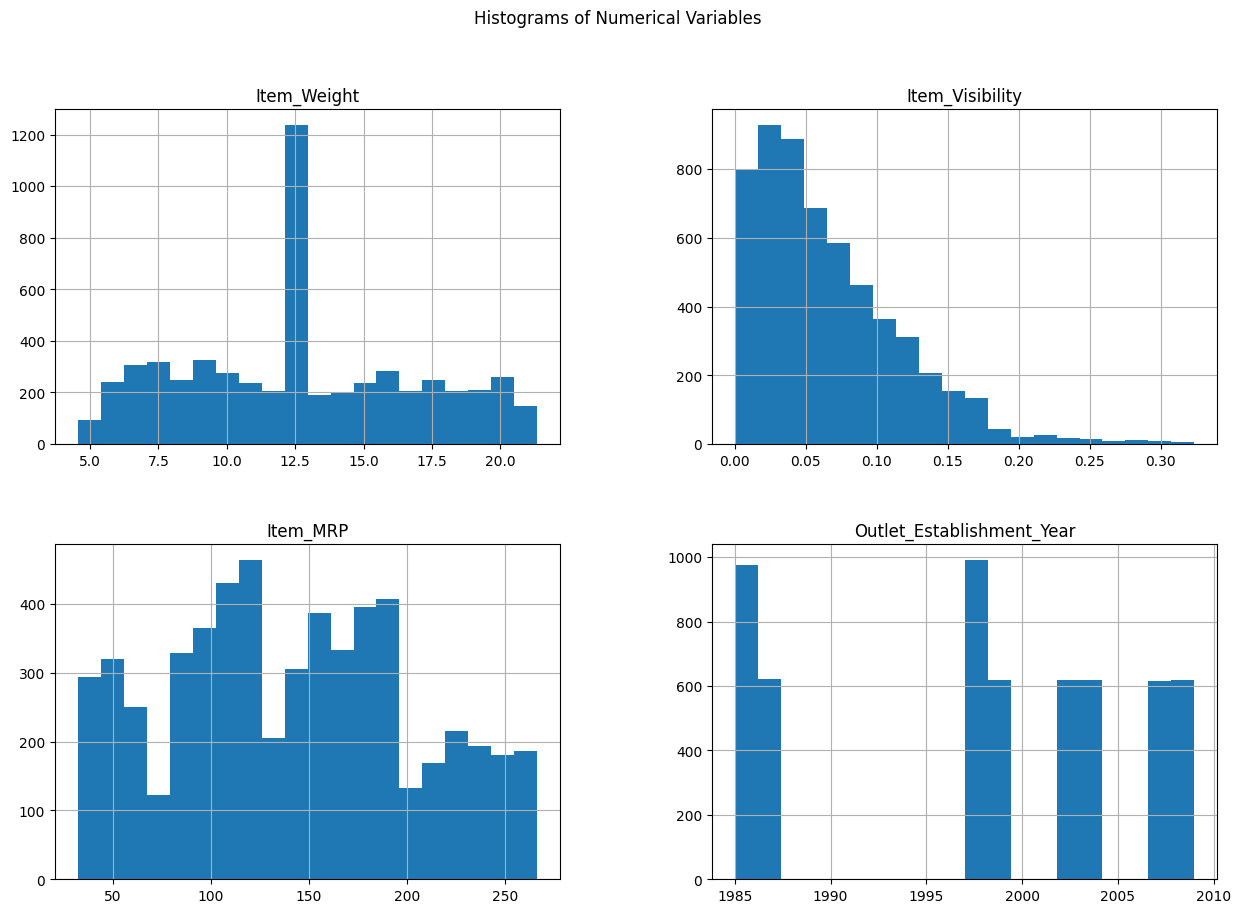

In [4]:
import matplotlib.pyplot as plt

# Plot histograms for numerical variables
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
test_data_encoded[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()


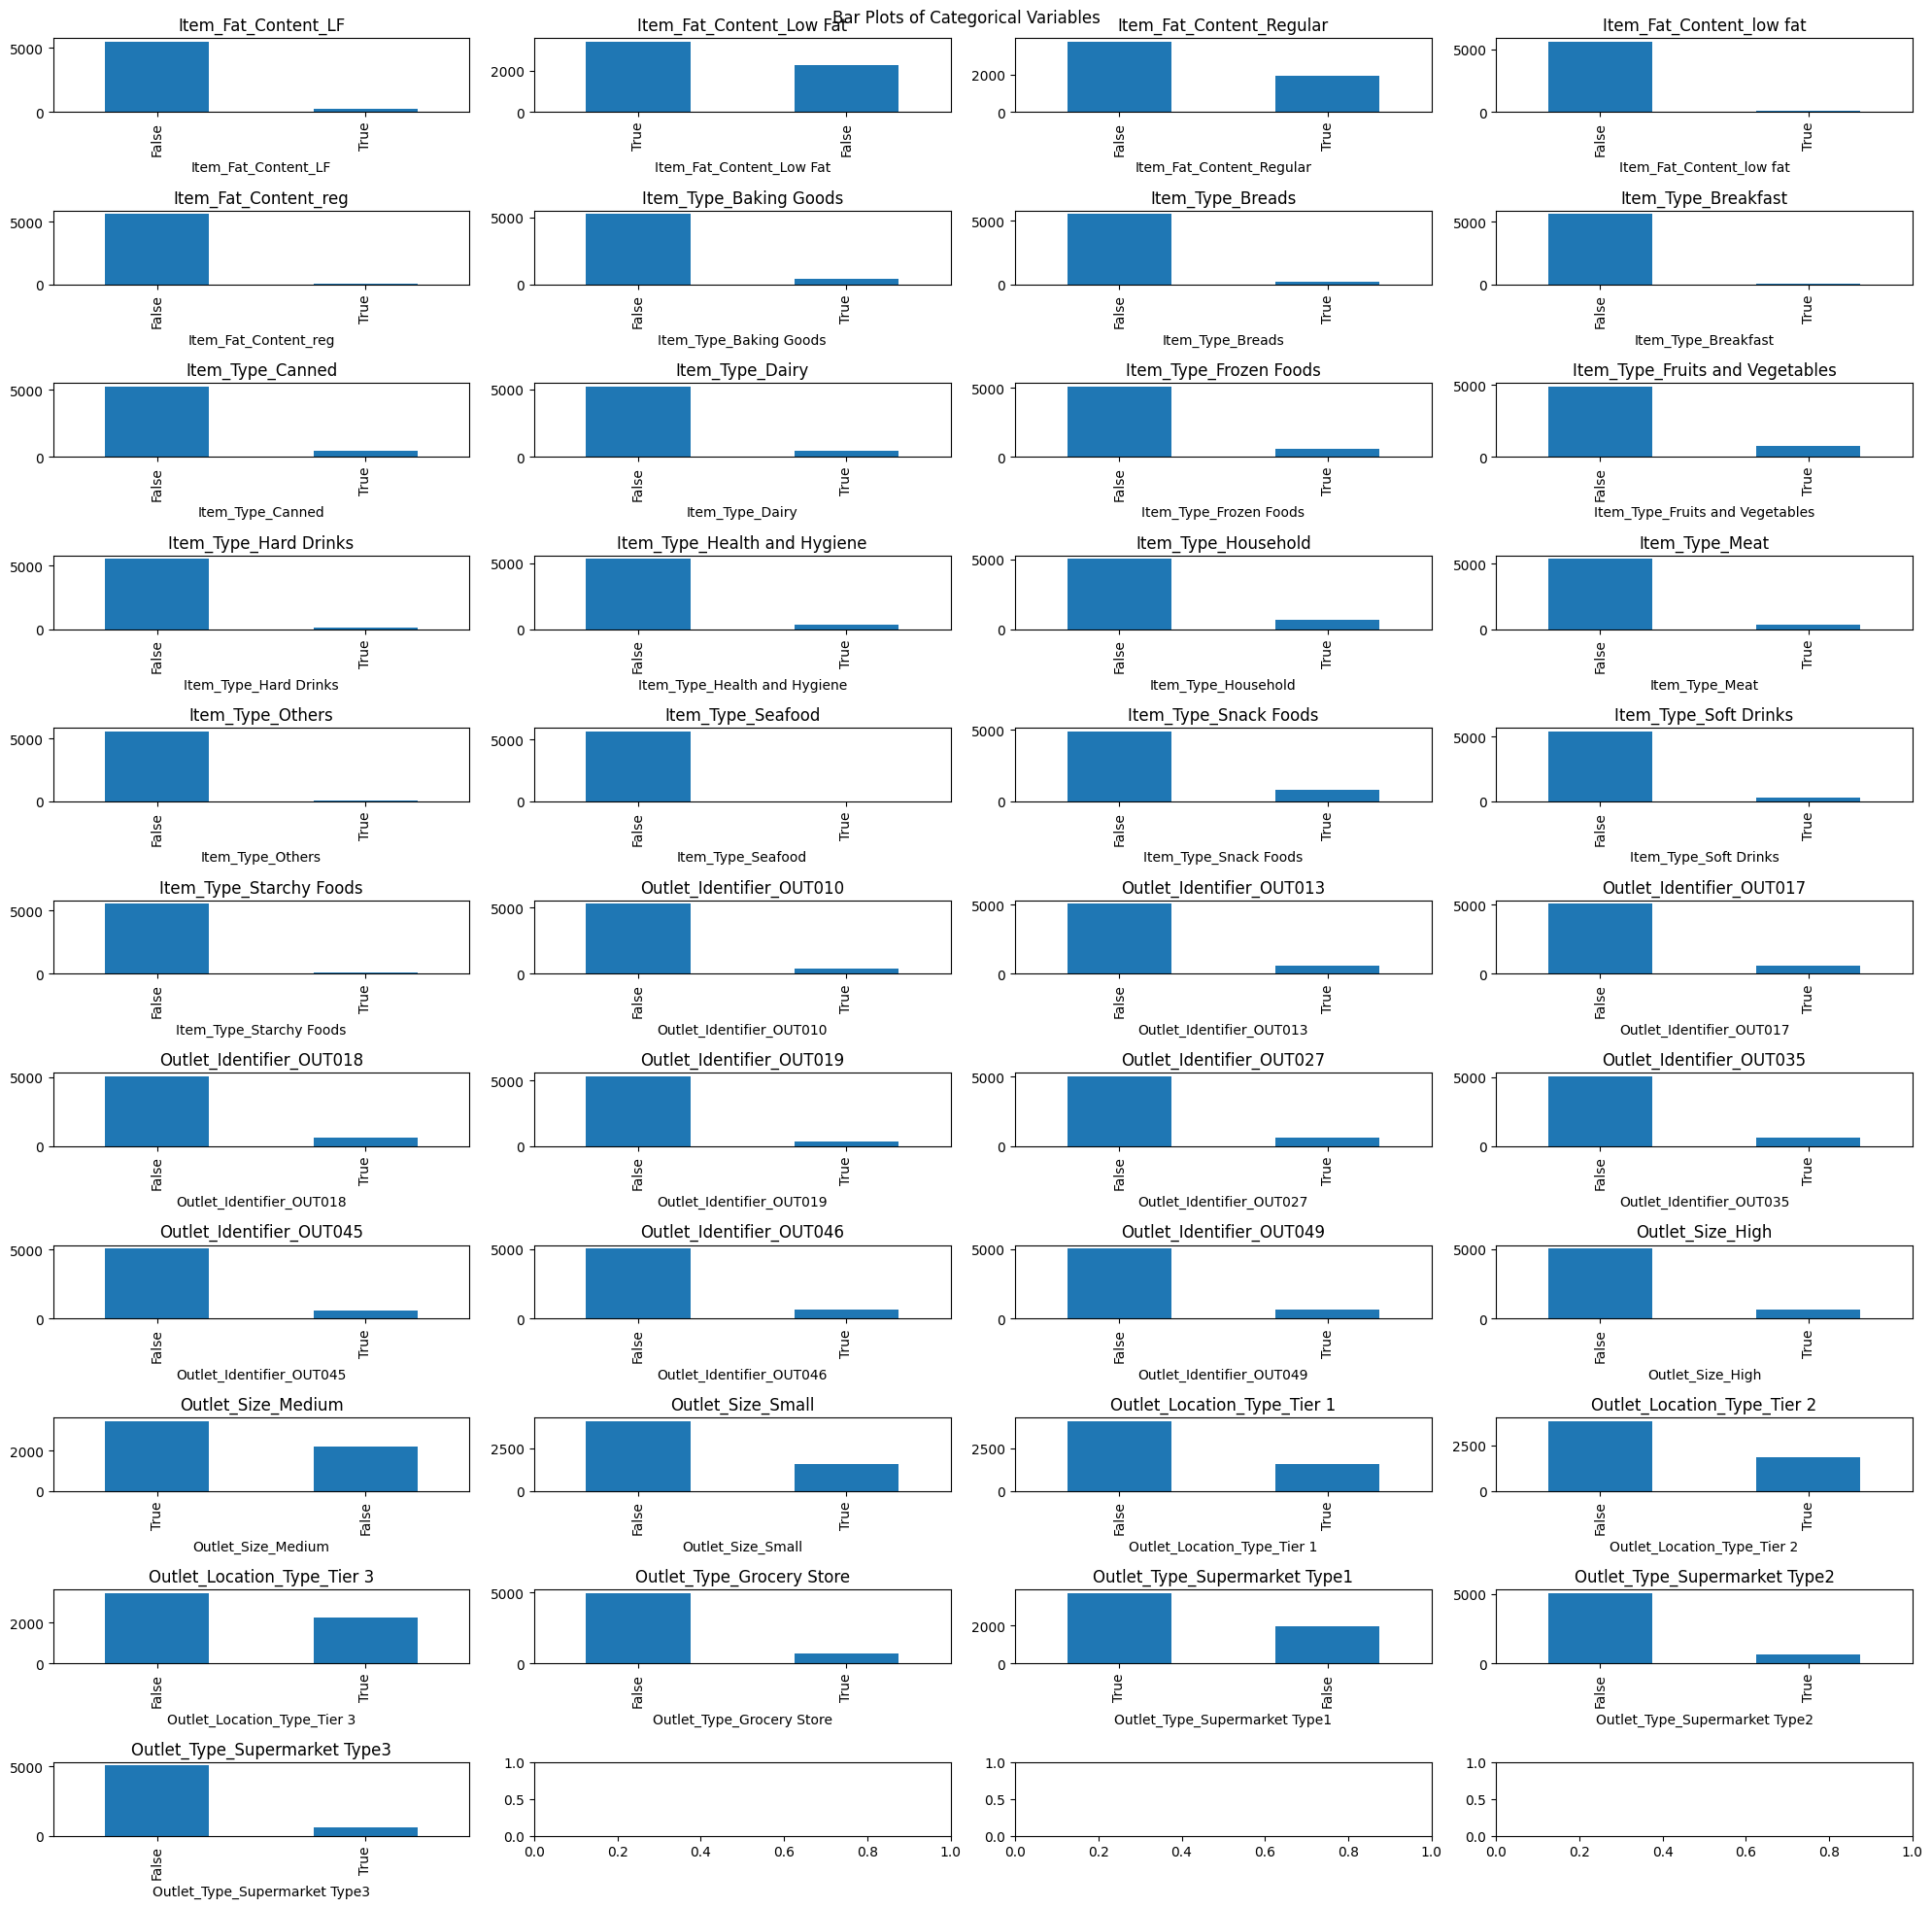

In [5]:
# Plot bar plots for categorical variables
categorical_cols = [col for col in test_data_encoded.columns if col not in numerical_cols]
num_categorical_cols = len(categorical_cols)
num_plots_per_row = 4  # Number of plots per row

# Plot bar plots for categorical variables
fig, axes = plt.subplots(num_categorical_cols // num_plots_per_row + 1, num_plots_per_row, figsize=(20, 20))
fig.suptitle('Bar Plots of Categorical Variables')

for i, col in enumerate(categorical_cols):
    ax = axes[i // num_plots_per_row, i % num_plots_per_row]
    test_data_encoded[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


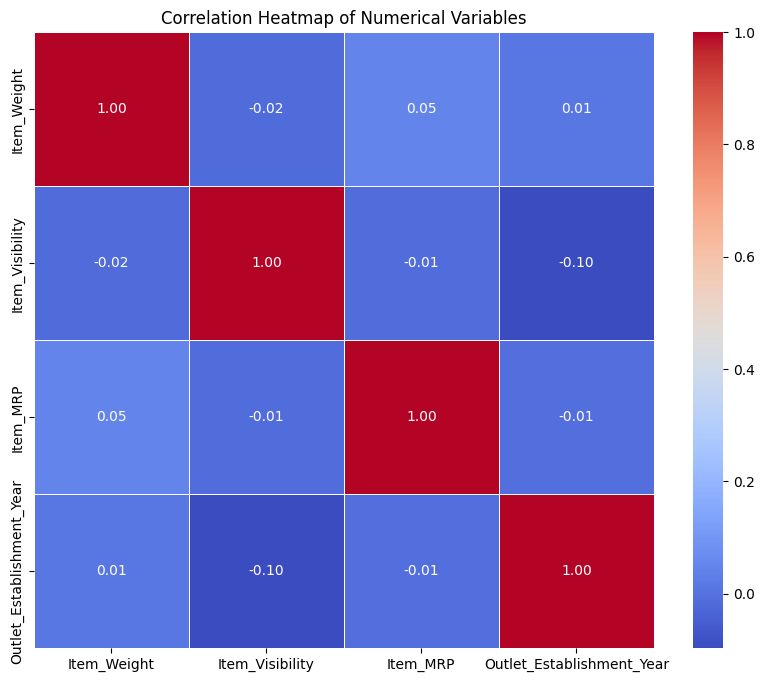

In [6]:
import seaborn as sns

# Generate correlation matrix
correlation_matrix = test_data_encoded[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [9]:
# Assuming 'Item_Weight' is the target variable
y = test_data_encoded['Item_Weight']
X = test_data_encoded.drop(columns=['Item_Weight'])

# Now we can split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Evaluate linear regression model
y_pred_linear = linear_regression_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)


Linear Regression Mean Squared Error: 17.996343388164277


In [11]:
from sklearn.svm import SVR

# Initialize and train SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Evaluate SVM model
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("SVM Mean Squared Error:", mse_svm)


SVM Mean Squared Error: 18.007624056534297


In [12]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Evaluate KNN model
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN Mean Squared Error:", mse_knn)

KNN Mean Squared Error: 21.055406820712353


In [13]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train decision tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Evaluate decision tree model
y_pred_tree = decision_tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Mean Squared Error:", mse_tree)


Decision Tree Mean Squared Error: 21.99148758814797


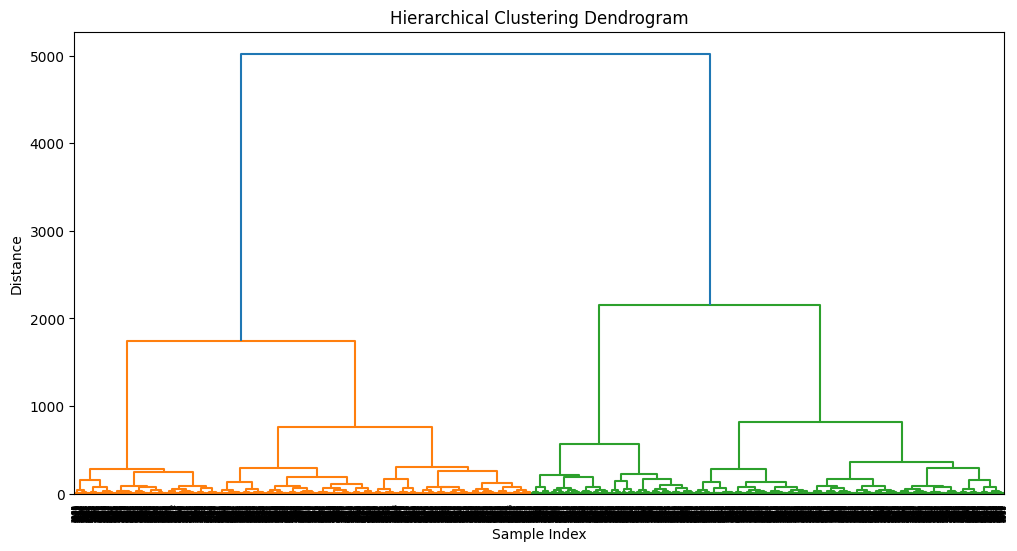

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X_train, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


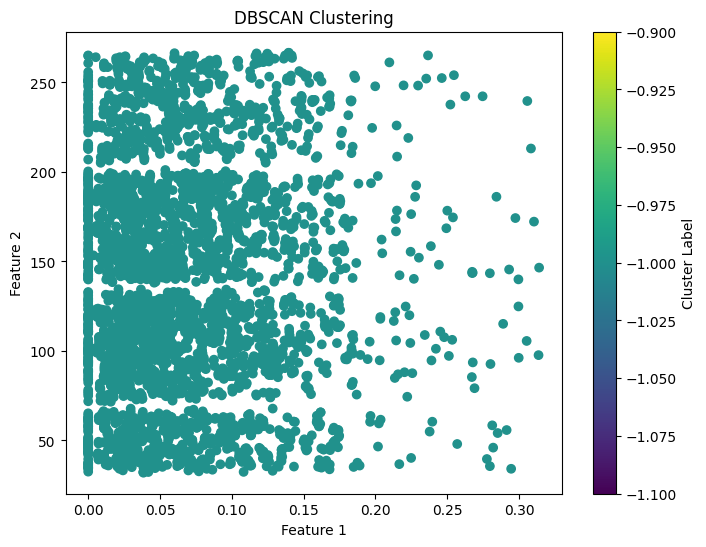

In [18]:
from sklearn.cluster import DBSCAN

# Initialize and train DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(X_train)

# Visualize clusters (assuming 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=dbscan_model.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [33]:
# Prompt the user to input values for the relevant features
user_input = {}  # Dictionary to store user inputs
for feature in test_data_encoded.columns:
    if test_data_encoded[feature].dtype == 'float64':
        user_input[feature] = float(input(f"Enter value for {feature}: "))
    elif feature == 'Outlet_Establishment_Year':
        user_input[feature] = int(input(f"Enter value for {feature}: "))
    else:
        # Display the available options (categories) for the categorical variable
        options = test_data_encoded[feature].unique()
        print(f"Available options for {feature}: [{', '.join(options)}]")

        # Prompt the user to select one of the categories from the options
        selected_category = input(f"Enter {feature}: ")
        user_input[feature] = selected_category

# Convert user input into DataFrame
user_df = pd.DataFrame([user_input])

# Predict using the trained Linear Regression model
predicted_output = linear_regression_model.predict(user_df)

# Display the predicted output to the user
print("Predicted Output:", predicted_output[0])


KeyboardInterrupt: Interrupted by user